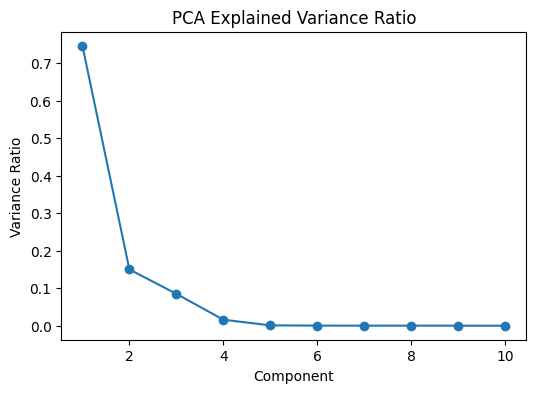

In [1]:
# %% [markdown]
# 02_pca_analysis.ipynb
# This notebook applies PCA to the preprocessed dataset.

# %%
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pathlib import Path
import joblib

ROOT = Path("..").resolve()

DATA_DIR = ROOT / "data"
RESULTS_DIR = ROOT / "results"
MODELS_DIR = ROOT / "models"

CLEANED_CSV = DATA_DIR / "heart_disease_cleaned.csv"

# %%
df = pd.read_csv(CLEANED_CSV)
X = df.drop(columns=["target"])
y = df["target"]

# %%
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), pca.explained_variance_ratio_, marker="o")
plt.title("PCA Explained Variance Ratio")
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.savefig(RESULTS_DIR / "pca_explained_variance.png")
plt.show()

joblib.dump(pca, MODELS_DIR / "pca_model.pkl")

X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1,11)])
X_pca_df["target"] = y
X_pca_df.to_csv(DATA_DIR / "heart_disease_pca.csv", index=False)
